# Langraph

## Building chatbot

In [1]:
pip install --upgrade -q  openai langchain langchain-openai langchain-community langgraph

Note: you may need to restart the kernel to use updated packages.


In [5]:
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

from typing import Annotated
from typing_extensions import TypedDict

In [10]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path="../cred.env")

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')



In [11]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

## Visualizing the Graph

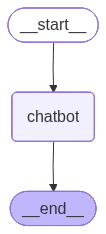

In [12]:
from IPython.display import display

display(graph)

In [13]:
pip install -q grandalf

Note: you may need to restart the kernel to use updated packages.


In [16]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


## Running chatbot

In [21]:
while True:
    user_input = input('Question: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print('Question: ', user_input)
            print('Answer: ', value['messages'][-1].content)
        print('-' * 50)

Question:  what is current time now?
Answer:  I'm sorry, but I don't have real-time capabilities to provide the current time. You can check the time on your device or through a search engine.
--------------------------------------------------
Question:  tell me what is current EST time
Answer:  I don't have real-time capabilities to check the current time. However, you can easily find the current Eastern Standard Time (EST) by checking your device's clock or searching online. Keep in mind that if Daylight Saving Time is in effect, the time would be Eastern Daylight Time (EDT), which is one hour ahead of EST.
--------------------------------------------------
Question:  how old is yopur data updated
Answer:  My knowledge is based on information available up until October 2021. I do not have updates or access to real-time data beyond that point.
--------------------------------------------------
Question:  how old is your LLM data? 
Answer:  My training data includes information up until

## Travily AI

In [23]:
pip install -q tavily-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from dotenv import load_dotenv

load_dotenv(dotenv_path="../cred.env")

TAVILY_API_KEY = os.getenv('TAVILY_API_KEY')



In [30]:
from tavily import TavilyClient
import os


clinet = TavilyClient(api_key=os.environ.get('TAVILY_API_KEY'))


response = clinet.search(query='What is price of NVDA stock today?')

In [39]:
response['answer']

'Generative AI is widely adopted in fintech for risk assessment, customer service, and market forecasting. Leading firms are implementing it for operational efficiency and personalized services. The trend shows rapid growth and widespread adoption in financial services.'

In [31]:
for item in response['results']:
    print(f'Title:{item['title']}, URL:{item['url']}')

Title:NVDA Stock Quote - NVDA Stock Price Today, URL:https://stockmarketwatch.com/stock/NVDA/
Title:Nvidia Stock Price Today | NASDAQ: NVDA Live - Investing.com, URL:https://www.investing.com/equities/nvidia-corp+
Title:NVDA Stock Price | NVIDIA Corp. Stock Quote (U.S.: Nasdaq) | MarketWatch, URL:https://www.marketwatch.com/investing/stock/NVDA
Title:NVDA: NVIDIA Corp - Stock Price, Quote and News - CNBC, URL:https://www.cnbc.com/quotes/NVDA
Title:NVDA.N - | Stock Price & Latest News | Reuters, URL:https://www.reuters.com/markets/companies/NVDA.N/all-listings


In [ ]:
response = clinet.search(

    query = "What are most used or popular/trending GenAI tehcnology among the Fintech and financial companies?",
    search_depth = 'advanced',
    max_result = 7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)

for item in response['results']:
    print(f'Title:{item['title']}, URL:{item['url'], {item['content']}}')

In [ ]:
response

In [ ]:
answer = clinet.qna_search(query='What is reflection and critique pattern used in Agentic AI and Langchain?')
                        
print(answer)

Reflection and critique in Agentic AI involves iterative self-assessment to refine outputs, improving accuracy and quality through continuous feedback loops. It uses a dual-agent system where one critiques the other's work. This method enhances decision-making and output quality.


## use Tavily with LLM

In [102]:
query='What is reflection and critique pattern used in Agentic AI and Langchain?'

response = clinet.search(query=query, max_results=5,search_depth='advanced')['results']
                        
print(response)

[{'url': 'https://www.analyticsvidhya.com/blog/2024/10/agentic-ai-reflection-pattern/', 'title': 'What is Agentic AI Reflection Pattern? - Analytics Vidhya', 'content': 'The Agentic AI Reflection Pattern is a method where the model generates, critiques, and refines its outputs through an iterative self-assessment process.\n This pattern enhances the accuracy and quality of AI-generated content by mimicking human-like feedback and revision loops.\n It is especially effective for large language models (LLMs), allowing them to catch mistakes, clarify ambiguities, and improve over multiple iterations. [...] The Reflection Pattern is an agentic AI design pattern applied to AI models, where the model generates an initial response to a prompt, evaluates this output for quality and correctness, and then refines the content based on its own feedback. The model essentially plays the dual roles of creator and critic. The process involves several iterations where the AI alternates between these tw

In [101]:
from langchain_community.adapters.openai import convert_openai_messages

prompt = [

{
    'role':'system',
    'content':f''' You are a AI critical thinker research assistant.
    Your sole purpose is to write well written, objective and structured reports on given text.'''
},
{
    'role':'user',
    'content':f''' Information: """{response}""" 
    using above information, answer following query: """{query}""" in detailed manner'''

}

]

lc_messages = convert_openai_messages(prompt)

lc_messages

[SystemMessage(content=' You are a AI critical thinker research assistant.\n    Your sole purpose is to write well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content=' Information: """[{\'title\': \'What Is ChatGPT? Everything You Need to Know | TechTarget\', \'url\': \'https://www.techtarget.com/whatis/definition/ChatGPT\', \'content\': \'Definition\\n\\n# What is ChatGPT?\\n\\nBy\\n\\n Amanda Hetler, Senior Editor\\n\\nPublished: Mar 04, 2025\\n\\nChatGPT is an artificial intelligence (AI) chatbot that uses natural language processing to create humanlike conversational dialogue. The language model can respond to questions and compose various written content, including articles, social media posts, essays, code and emails. [...] ChatGPT is a form of generative AI -- a tool that lets users enter prompts to receive humanlike images, text or videos that are created by AI. [...] ChatGPT is similar to the automated 

In [58]:
reponse = ChatOpenAI(model='gpt-4o-mini').invoke(lc_messages)

In [100]:

reponse.content


'### Understanding the Reflection and Critique Pattern in Agentic AI and Langchain\n\n**Definition of Reflection in AI:**\nReflection within the context of Agentic AI refers to a methodological approach in which AI systems, specifically large language models (LLMs), engage in a process of self-assessment. This entails the model generating content in response to a prompt, evaluating its output for quality and correctness, and refining that content based on its self-critique. The dual role of the AI as both creator and critic allows for an iterative improvement cycle, enhancing the overall quality and accuracy of the generated outputs.\n\n**Key Features of the Reflection Pattern:**\n\n1. **Iterative Process:**\n   - The Reflection Pattern employs an iterative design process where the AI improves its outputs through continuous feedback loops. This involves producing an initial draft and repeatedly assessing and refining it to reach a predetermined standard of quality.\n\n2. **Self-Critiqu

## Use tools with Chatbot

In [ ]:
pip install --upgrade botocore 

In [68]:
pip install -q langchain-tavily

Note: you may need to restart the kernel to use updated packages.


In [69]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=3)

tools = [tool]


In [99]:
response = tool.invoke('What is chatgpt?')

response

[{'title': 'What Is ChatGPT? Everything You Need to Know | TechTarget',
  'url': 'https://www.techtarget.com/whatis/definition/ChatGPT',
  'content': 'Definition\n\n# What is ChatGPT?\n\nBy\n\n Amanda Hetler, Senior Editor\n\nPublished: Mar 04, 2025\n\nChatGPT is an artificial intelligence (AI) chatbot that uses natural language processing to create humanlike conversational dialogue. The language model can respond to questions and compose various written content, including articles, social media posts, essays, code and emails. [...] ChatGPT is a form of generative AI -- a tool that lets users enter prompts to receive humanlike images, text or videos that are created by AI. [...] ChatGPT is similar to the automated chat services found on customer service websites, as people can ask it questions or request clarification to ChatGPT\'s replies. The GPT stands for "Generative Pre-trained Transformer," which refers to how ChatGPT processes requests and formulates responses. ChatGPT is traine

In [72]:
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict


class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
tool_node=ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools", "chatbot")


graph_builder.set_entry_point("chatbot")
#graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()




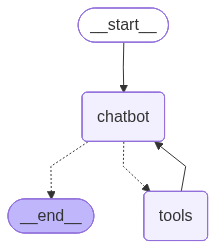

In [73]:
graph

In [75]:
while True:

    user_input = input('Ask your question: ')

    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print('Question: ', user_input)
            print('Answer: ', value['messages'][-1].content)
        print('-' * 50)

Question:  what is name of first person to go on moon?
Answer:  The first person to walk on the Moon was Neil Armstrong. He did so on July 20, 1969, during NASA's Apollo 11 mission.
--------------------------------------------------
Question:  what is name of first person to land on moon?
Answer:  The first person to land on the Moon was Neil Armstrong. He was an astronaut on the Apollo 11 mission, which successfully landed on the Moon on July 20, 1969. Armstrong famously said, "That's one small step for [a] man, one giant leap for mankind," as he stepped onto the lunar surface.
--------------------------------------------------
Question:  who is 2nd person to land on mmon
Answer:  
--------------------------------------------------
Question:  who is 2nd person to land on mmon
Answer:  [{"title": "List of People Who Have Walked on Moon - Jagran Josh", "url": "https://www.jagranjosh.com/general-knowledge/people-who-have-walked-on-moon-1692885221-1", "content": "Neil Armstrong\n\nThe fir

## Adding memory to chatbot

In [76]:
pip install -q langgraph-checkpoint-sqlite

Note: you may need to restart the kernel to use updated packages.


In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
tool_node=ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools", "chatbot")


graph_builder.set_entry_point("chatbot")
#graph_builder.set_finish_point("chatbot")

#graph = graph_builder.compile()

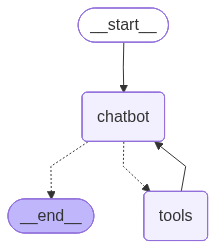

In [78]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

memory = SqliteSaver.from_conn_string(':memory:')

graph = graph_builder.compile(checkpointer=MemorySaver())

graph

In [96]:
config = {'configurable': {'thread_id': '1'}} ## thread for tracking 

prompt = 'I am Ani and you are expert in ML and Gen AI technologies'

events = graph.stream({'messages': ('user', prompt)}, config=config, stream_mode='values')


for event in events:
    print(event['messages'][-1].pretty_print())


================================ Human Message =================================

I am Ani and you are expert in ML and Gen AI technologies
None
================================== Ai Message ==================================

Hello Ani! I'm here to assist you with anything related to machine learning and generative AI. If you have questions or topics you'd like to explore, please let me know!
None


In [97]:
prompt = 'What is my name and what is your name?'

events = graph.stream({'messages': ('user', prompt)}, config=config, stream_mode='values')


for event in events:
    print(event['messages'][-1].pretty_print())



================================ Human Message =================================

What is my name and what is your name?
None
================================== Ai Message ==================================

Your name is Ani, and I am an AI designed to assist you with information and questions related to machine learning and generative AI technologies. How can I help you today?
None


In [98]:
snapshot = graph.get_state(config)

snapshot

StateSnapshot(values={'messages': [HumanMessage(content='I am Ani and you are expert in ML and Gen AI technologies', additional_kwargs={}, response_metadata={}, id='e150d756-d03b-4fc2-8a59-b1de31ac88b5'), HumanMessage(content='I am Ani and you are expert in ML and Gen AI technologies', additional_kwargs={}, response_metadata={}, id='0241989e-3d38-46c5-aaa2-ca3d32d1eb47'), HumanMessage(content='I am Ani and you are expert in ML and Gen AI technologies', additional_kwargs={}, response_metadata={}, id='08de1fb3-7ed0-48fb-8f40-dc4ee13f5b74'), AIMessage(content="Hello Ani! I'm here to help you with any questions or information you need about machine learning (ML) and generative AI technologies. What would you like to know?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 126, 'total_tokens': 161, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_toke